## Consulting Visuals 

In [1]:
import pandas as pd
import data_work


import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = data_work.load_data()
df = data_work.clean_values(df)
df.head()

,contract_id,contract_start,contract_term,deposit,monthly_amt,company,sector,industry,email,address,city,state,zip
customer_id,,,,,,,,,,,,,
1,41,5/31/2019,24,86000.0,11200.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,358,6/18/2019,13,74000.0,19000.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,400,8/11/2019,19,38000.0,8800.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,424,3/13/2019,15,77000.0,14300.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,438,10/16/2019,22,39000.0,20000.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170


In [2]:
df_time = data_work.detail_calculations(df)
df_time.head()

,customer_id,contract_id,deposit,amt_due,company,sector,industry,email,address,city,state,zip
due_date,,,,,,,,,,,,
2019-01-01,20,60,False,11900.0,Omba,NaN,NaN,ctreblej@ifeng.com,2120 Kensington Center,Seattle,WA,98185
2019-01-01,90,392,True,67000.0,Brightbean,Health Care,Biotechnology: Biological Products (No Diagnos...,ncoaten2h@altervista.org,11712 Elgar Center,Portland,OR,97206
2019-01-01,90,392,False,7700.0,Brightbean,Health Care,Biotechnology: Biological Products (No Diagnos...,ncoaten2h@altervista.org,11712 Elgar Center,Portland,OR,97206
2019-01-01,168,627,True,78000.0,Leenti,Consumer Services,Television Services,ndoone4n@go.com,471 Northwestern Way,Cincinnati,OH,45208
2019-01-01,168,627,False,18700.0,Leenti,Consumer Services,Television Services,ndoone4n@go.com,471 Northwestern Way,Cincinnati,OH,45208


In [3]:
df_time = df_time.reset_index()
df_time['year'] = df_time['due_date'].dt.year
df_time['month'] = df_time['due_date'].dt.month
df_time.head()

,due_date,customer_id,contract_id,deposit,amt_due,company,sector,industry,email,address,city,state,zip,year,month
0,2019-01-01,20,60,False,11900.0,Omba,NaN,NaN,ctreblej@ifeng.com,2120 Kensington Center,Seattle,WA,98185,2019,1
1,2019-01-01,90,392,True,67000.0,Brightbean,Health Care,Biotechnology: Biological Products (No Diagnos...,ncoaten2h@altervista.org,11712 Elgar Center,Portland,OR,97206,2019,1
2,2019-01-01,90,392,False,7700.0,Brightbean,Health Care,Biotechnology: Biological Products (No Diagnos...,ncoaten2h@altervista.org,11712 Elgar Center,Portland,OR,97206,2019,1
3,2019-01-01,168,627,True,78000.0,Leenti,Consumer Services,Television Services,ndoone4n@go.com,471 Northwestern Way,Cincinnati,OH,45208,2019,1
4,2019-01-01,168,627,False,18700.0,Leenti,Consumer Services,Television Services,ndoone4n@go.com,471 Northwestern Way,Cincinnati,OH,45208,2019,1


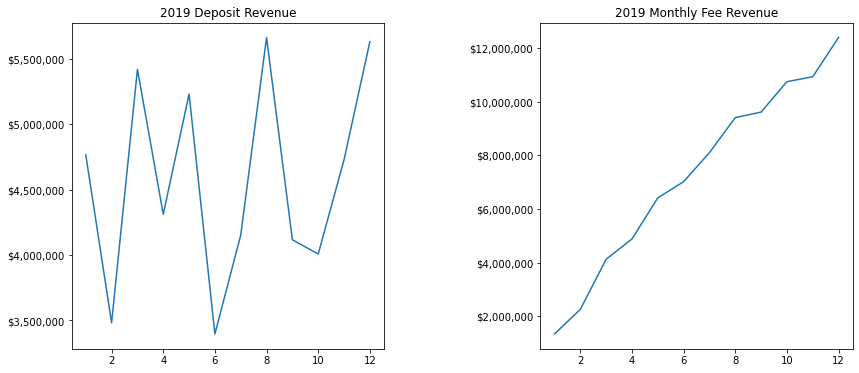

In [4]:
fmt= '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)


plot_deposits = df_time.loc[(df_time['year'] == 2019) & (df_time['deposit'] == True)]
plot_monthly = df_time.loc[(df_time ['year'] == 2019) & (df_time['deposit'] == False)]

plot_deposits = plot_deposits.groupby('month').agg({'amt_due':sum})
plot_monthly = plot_monthly.groupby('month').agg({'amt_due':sum})

fig, axs = plt.subplots(1,2, figsize=(14,6))
axs[0].set_title("2019 Deposit Revenue")
axs[0].plot(plot_deposits)
axs[0].yaxis.set_major_formatter(tick) 

axs[1].set_title("2019 Monthly Fee Revenue")
axs[1].plot(plot_monthly)
axs[1].yaxis.set_major_formatter(tick) 

plt.subplots_adjust(wspace = .5)

In [5]:
plot_deposits

,amt_due
month,
1,4766000.0
2,3482000.0
3,5419000.0
4,4312000.0
5,5231000.0
6,3397000.0
7,4152000.0
8,5663000.0
9,4117000.0


In [6]:
df = data_work.clean_values(df)
df.head()

,contract_id,contract_start,contract_term,deposit,monthly_amt,company,sector,industry,email,address,city,state,zip
customer_id,,,,,,,,,,,,,
1,41,2019-05-31,24,86000.0,11200.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,358,2019-06-18,13,74000.0,19000.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,400,2019-08-11,19,38000.0,8800.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,424,2019-03-13,15,77000.0,14300.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,438,2019-10-16,22,39000.0,20000.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170


In [7]:
df = data_work.summary_calculations(df)
df.head()

,contract_id,contract_start,contract_term,deposit,monthly_amt,company,sector,industry,email,address,city,state,zip,monthly_total_revenue,total_revenue
customer_id,,,,,,,,,,,,,,,
1,41,2019-05-31,24,86000.0,11200.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,268800.0,354800.0
1,358,2019-06-18,13,74000.0,19000.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,247000.0,321000.0
1,400,2019-08-11,19,38000.0,8800.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,167200.0,205200.0
1,424,2019-03-13,15,77000.0,14300.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,214500.0,291500.0
1,438,2019-10-16,22,39000.0,20000.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,440000.0,479000.0


In [8]:
df_detail = data_work.detail_calculations(df)
df_detail.head()

,customer_id,contract_id,deposit,amt_due,company,sector,industry,email,address,city,state,zip
due_date,,,,,,,,,,,,
2019-01-01,20,60,False,11900.0,Omba,NaN,NaN,ctreblej@ifeng.com,2120 Kensington Center,Seattle,WA,98185
2019-01-01,90,392,True,67000.0,Brightbean,Health Care,Biotechnology: Biological Products (No Diagnos...,ncoaten2h@altervista.org,11712 Elgar Center,Portland,OR,97206
2019-01-01,90,392,False,7700.0,Brightbean,Health Care,Biotechnology: Biological Products (No Diagnos...,ncoaten2h@altervista.org,11712 Elgar Center,Portland,OR,97206
2019-01-01,168,627,True,78000.0,Leenti,Consumer Services,Television Services,ndoone4n@go.com,471 Northwestern Way,Cincinnati,OH,45208
2019-01-01,168,627,False,18700.0,Leenti,Consumer Services,Television Services,ndoone4n@go.com,471 Northwestern Way,Cincinnati,OH,45208


In [9]:
df_detail.tail()

,customer_id,contract_id,deposit,amt_due,company,sector,industry,email,address,city,state,zip
due_date,,,,,,,,,,,,
2021-09-14,4,378,False,15700.0,Viva,Health Care,Major Pharmaceuticals,wgiovanitti3@nytimes.com,074 Center Place,Topeka,KS,66667
2021-09-14,107,974,False,19900.0,Flashset,Health Care,Medical Specialities,mstummeyer2y@npr.org,236 Weeping Birch Parkway,Dallas,TX,75216
2021-09-25,183,364,False,18600.0,Bubblebox,Finance,Major Banks,kklageman52@about.me,6298 Maryland Center,Erie,PA,16510
2021-09-25,172,43,False,19700.0,Brainsphere,Health Care,Medical/Dental Instruments,sassur4r@bloglovin.com,5881 Ruskin Circle,Portland,OR,97206
2021-10-04,29,509,False,9400.0,Yodoo,NaN,NaN,lwinstanleys@noaa.gov,3 Oneill Court,Tucson,AZ,85715


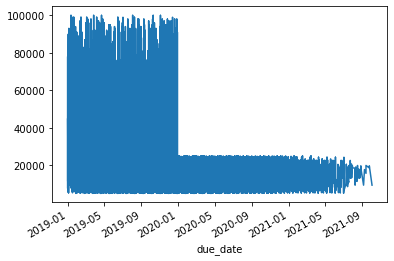

In [10]:
df_detail['amt_due'].plot()

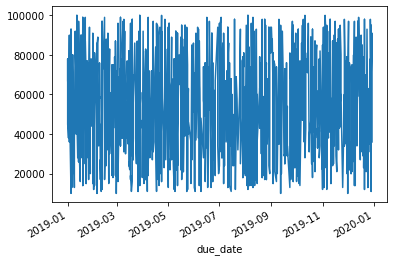

In [11]:
df_detail.loc[df_detail['deposit'], 'amt_due'].plot()

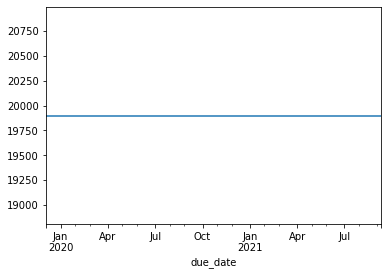

In [12]:
df_detail.loc[(
    (df_detail['deposit'] == False) &
    (df_detail['contract_id'] == 974)
), 'amt_due'].plot()

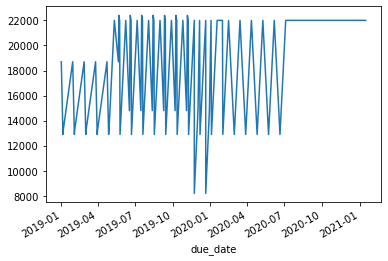

In [13]:
df_detail.loc[(
    (df_detail['deposit'] == False) &
    (df_detail['industry'] == 'Television Services')
), 'amt_due'].plot()

In [14]:
df_detail.groupby('state').agg({'amt_due':'sum'}).plot.bar(y = 'amt_due', x= 'state')

KeyError: 'state'

In [ ]:
df_detail.groupby('state', as_index=False).agg({'amt_due':'sum'}).plot.bar(y = 'amt_due', x= 'state')

In [ ]:
df_detail.groupby('state', as_index=False).agg({'amt_due':'sum'}).sort_values('amt_due').plot.bar(y = 'amt_due', x= 'state')

In [ ]:
df_v = df_detail.reset_index()
df_v['year'] = df_v['due_date'].dt.year
df_v['month'] = df_v['due_date'].dt.month
df_v.head()

In [ ]:
df_v.groupby(['year', 'month']).agg({'amt_due':sum}).plot()

In [ ]:
df_v.groupby(['year', 'month']).agg({'amt_due':sum}).plot(figsize=(20, 10))

In [ ]:
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

df_v.groupby(['year', 'month']).agg({'amt_due':sum}).plot(figsize=(20, 10)).yaxis.set_major_formatter(tick)
plt.xticks(rotation=45)